<IPython.core.display.Javascript object>


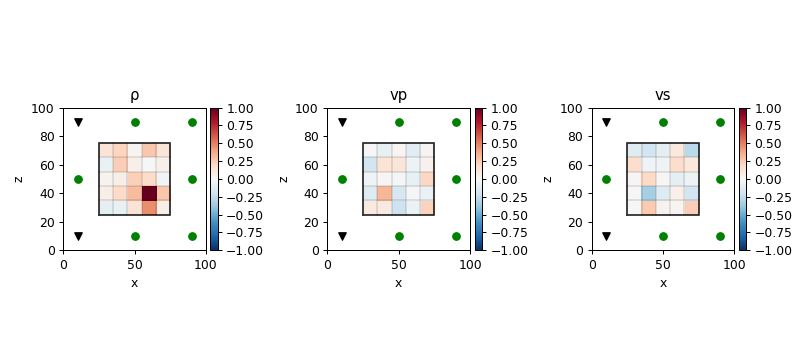

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib notebook
burnin = 0
folder = 'inversion17_multiple'
a = np.load(folder + "/combined.npy")
sources = np.loadtxt(folder + "/setup/sources.txt")
receivers = np.loadtxt(folder + "/setup/receivers.txt")
a = a[burnin:, :]

# Function for drawing the discretization grid.
def drawGrid(xstart, xend, zstart, zend, xint=10, zint=10):
    for i in range(xstart, xend + 1, xint):
        plt.plot([i, i], [zstart, zend], color='black', alpha=0.1)
    for j in range(zstart, zend + 1, zint):
        plt.plot([xstart, xend], [j, j], color='black', alpha=0.1)

# If only one source/receiver we need to make explicit matrices from vectors.
if sources.shape == (2,):
    sources = np.expand_dims(sources, axis=0)
if receivers.shape == (2,):
    receivers = np.expand_dims(receivers, axis=0)

# Event handler
def onclick(event):
    if (event.inaxes == ax1):
        axis = 1
    elif (event.inaxes == ax2):
        axis = 2
    elif (event.inaxes == ax3):
        axis = 3
    else:
        return None

    if (event.xdata < 25 or event.xdata > 75 or event.ydata < 25 or event.ydata > 75):
        return None

    ix = int(np.floor((event.xdata - 25) / 10))
    iz = int(4 - np.floor((event.ydata - 25) / 10))

    icor = ix + iz*5 + (axis-1) * 25

    correlations = corr.values[icor, :]

    de_cor = np.zeros((nx, ny))
    vp_cor = np.zeros((nx, ny))
    vs_cor = np.zeros((nx, ny))

    for i in range(0, nx):
        for j in range(0, ny):
            de_cor[i, j] = correlations[i + j * nx]
            vp_cor[i, j] = correlations[i + j * nx + ncells]
            vs_cor[i, j] = correlations[i + j * nx + ncells * 2]

    de_cor = np.transpose(de_cor)
    vp_cor = np.transpose(vp_cor)
    vs_cor = np.transpose(vs_cor)

    ax1.imshow(de_cor, extent=(25, 75, 25, 75), cmap=plt.get_cmap('RdBu_r'), vmin=-1, vmax=1)
    ax2.imshow(vp_cor, extent=(25, 75, 25, 75), cmap=plt.get_cmap('RdBu_r'), vmin=-1, vmax=1)
    ax3.imshow(vs_cor, extent=(25, 75, 25, 75), cmap=plt.get_cmap('RdBu_r'), vmin=-1, vmax=1)
    plt.show()


nx = int(((a.shape[1] - 1) / 3) ** 0.5)
ny = nx
ncells = int(((a.shape[1] - 1) / 3))

data = {}
for i in range(0, ncells):
    data['de_' + str(i).zfill(2)] = a[::1000, i]
    data['vp_' + str(i).zfill(2)] = a[::1000, i + ncells]
    data['vs_' + str(i).zfill(2)] = a[::1000, i + ncells * 2]

data = pd.DataFrame(data=data)
corr = data.corr()

variances = corr.values[18, :]

de_var = np.zeros((nx, ny))
vp_var = np.zeros((nx, ny))
vs_var = np.zeros((nx, ny))

for i in range(0, nx):
    for j in range(0, ny):
        de_var[i, j] = variances[i + j * nx]
        vp_var[i, j] = variances[i + j * nx + ncells]
        vs_var[i, j] = variances[i + j * nx + ncells * 2]

de_var = np.transpose(de_var)
vp_var = np.transpose(vp_var)
vs_var = np.transpose(vs_var)

var1 = np.mean(de_var)
var2 = np.mean(vp_var)
var3 = np.mean(vs_var)

plt.figure(figsize=(9, 4))

ax1 = plt.subplot(1, 3, 1)
im = plt.imshow(de_var, extent=(25, 75, 25, 75), cmap=plt.get_cmap('RdBu_r'), vmin=-1, vmax=1)
drawGrid(25, 75, 25, 75, int(50 / nx), int(50 / ny))
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.xlabel('x')
plt.ylabel('z')
# plt.title('True density anomaly')
plt.title('ρ')
plt.plot([25, 25, 75, 75, 25], [25, 75, 75, 25, 25], color='black', alpha=0.75)
plt.scatter(sources[:, 0], sources[:, 1], marker='v', color='black')
plt.scatter(receivers[:, 0], receivers[:, 1], marker='o', color='green')
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
#plt.ylabel('% anomaly')

ax2 = plt.subplot(1, 3, 2)
im = plt.imshow(vp_var, extent=(25, 75, 25, 75), cmap=plt.get_cmap('RdBu_r'), vmin=-1, vmax=1)
drawGrid(25, 75, 25, 75, int(50 / nx), int(50 / ny))
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.xlabel('x')
plt.ylabel('z')
# plt.title('True vp anomaly')
plt.title('vp')
plt.plot([25, 25, 75, 75, 25], [25, 75, 75, 25, 25], color='black', alpha=0.75)
plt.scatter(sources[:, 0], sources[:, 1], marker='v', color='black')
plt.scatter(receivers[:, 0], receivers[:, 1], marker='o', color='green')
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
#plt.ylabel('% anomaly')

ax3 = plt.subplot(1, 3, 3)
im = plt.imshow(vs_var, extent=(25, 75, 25, 75), cmap=plt.get_cmap('RdBu_r'), vmin=-1, vmax=1)
drawGrid(25, 75, 25, 75, int(50 / nx), int(50 / ny))
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.xlabel('x')
plt.ylabel('z')
# plt.title('True vs anomaly')
plt.title('vs')
plt.plot([25, 25, 75, 75, 25], [25, 75, 75, 25, 25], color='black', alpha=0.75)
plt.scatter(sources[:, 0], sources[:, 1], marker='v', color='black')
plt.scatter(receivers[:, 0], receivers[:, 1], marker='o', color='green')
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
#plt.ylabel('% anomaly')

plt.subplots_adjust(left=0.125,  # the left side of the subplots of the figure
                    right=0.9,  # the right side of the subplots of the figure
                    bottom=0.1,  # the bottom of the subplots of the figure
                    top=0.9,  # the top of the subplots of the figure
                    wspace=0.6,  # the amount of width reserved for blank space between subplots
                    hspace=0.2)  # the amount of height reserved for white space between subplots)

cid = plt.gcf().canvas.mpl_connect('button_press_event', onclick)

plt.show()
plt.tight_layout()
